<div align="center">
  <h1 style="font-size: 40px; text-decoration: double underline; font-weight: bold; color: #03001C;">Capstone Project</h1>
  <h2 style="font-size: 20px; color: #03001C;"></h2>
</div>

<h2 align="center" style="font-size: 36px;text-decoration:  underline; color: #301E67;">Click Through Rate Prediction Assignment</h2>


<h2  style="font-size: 24px; color: #301E67;">Target</h2>

- How do you know which ad to use and who to target?

- Many companies advertise products in the same category, so how do you decide whose ad to display?

- Which ad should be placed on which part of the web page?

- Should a particular ad be pushed on a mobile device or remain on a desktop or laptop?



<h2  style="font-size: 24px; color: #301E67;">Table Of Content</h2>

| Variable         | Description                                              |
| ---------------- | -------------------------------------------------------- |
| click            | 0/1 for non-click/click                                  |
| hour             | Format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC |
| C1               | Anonymized categorical variable                          |
| banner_pos       | Position of the ad/banner on the page                    |
| site_id          | Unique ID of the site on which the ad is shown           |
| site_domain      | Unique domain of the site on which the ad is shown       |
| site_category    | Category of the site on which the ad is shown            |
| app_id           | App ID of the site on which the ad is shown              |
| app_domain       | App category of the site on which the ad is shown        |
| app_category     | Category ID of the site on which the ad is shown         |
| device_id        | Device ID on which the ad was shown                      |
| device_ip        | IP address of the device on which the ad was shown       |
| device_model     | Model type of the device on which the ad was shown       |
| device_type      | The device type on which the ad was shown                |
| device_conn_type | The connection type of the device on which the ad was shown |
| C14 - C21        | Anonymized categorical variables                         |


<h2  style="font-size: 18px; color: #301E67;">Including Essential Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', 0)
plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format
import math
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import random
import gzip
import category_encoders as ce
pd.options.display.float_format = '{:.3f}'.format

<h2  style="font-size: 24px; color: #301E67;">EDA : Exploratory Data Analysis</h2>
<h2  style="font-size: 24px; color: #301E67;">____________________________________________________________________</h2>


In [2]:
# reading the dataset
df = pd.read_csv('data (1).csv')

In [3]:
# examing top 5 dataset
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [4]:
# Examing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [5]:
# Checking Null Value
df.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>

- There are no Null Value 


In [6]:
# Examining the Statistical Value
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000
mean,1004.968,0.290,1.016,0.329,18857.232,318.835,60.279,2114.613,1.440,227.235,53292.002,83.164,10.000,2.593,25.486,11.301,0.170
std,1.092,0.506,0.531,0.855,4944.919,21.511,47.713,607.469,1.327,351.472,49952.340,70.161,0.000,1.723,2.969,5.939,0.375
min,1001.000,0.000,0.000,0.000,375.000,120.000,20.000,112.000,0.000,33.000,-1.000,1.000,10.000,0.000,21.000,0.000,0.000
25%,1005.000,0.000,1.000,0.000,16920.000,320.000,50.000,1863.000,0.000,35.000,-1.000,23.000,10.000,1.000,23.000,7.000,0.000
50%,1005.000,0.000,1.000,0.000,20346.000,320.000,50.000,2323.000,2.000,39.000,100050.000,61.000,10.000,2.000,26.000,11.000,0.000
75%,1005.000,1.000,1.000,0.000,21893.000,320.000,50.000,2526.000,3.000,171.000,100093.000,101.000,10.000,4.000,28.000,16.000,0.000
max,1012.000,7.000,5.000,5.000,24043.000,1024.000,1024.000,2757.000,3.000,1839.000,100248.000,255.000,10.000,6.000,30.000,23.000,1.000


<h2  style="font-size: 24px; color: #301E67;">Segmentation</h2>


In [7]:
# Examinig the unique value
df.nunique()

click                   2
C1                      7
banner_pos              7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_ip           78013
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
y                       2
dtype: int64

In [8]:
# Dropping not required Data
df.drop(["device_id","device_ip","month","click"], axis =1 , inplace = True)

In [9]:
# Checking the columns
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [10]:
# chceking Shape
df.shape

(99999, 23)

In [11]:
# Creating Categorical and Numerical Value
num = ['C14','C17','C19','C21']
cat= ['C1', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'dayofweek', 'day','hour']


<h2  style="font-size: 16px; color: #301E67;">Univariate Analysis</h2>


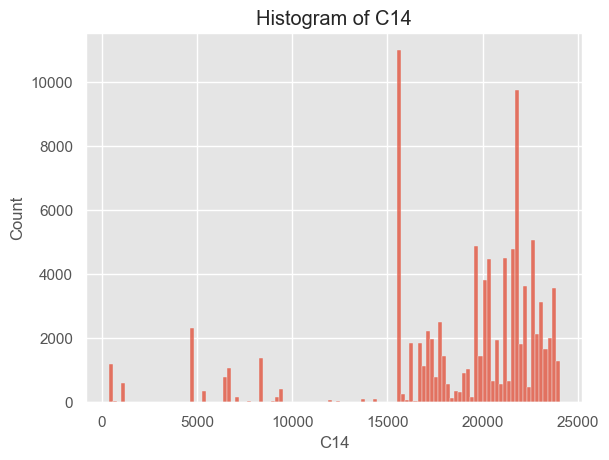

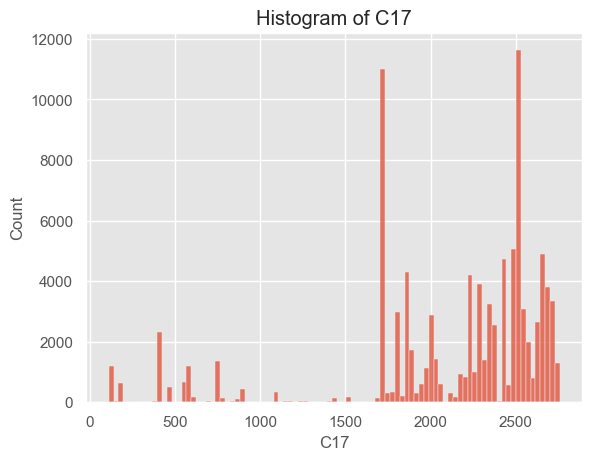

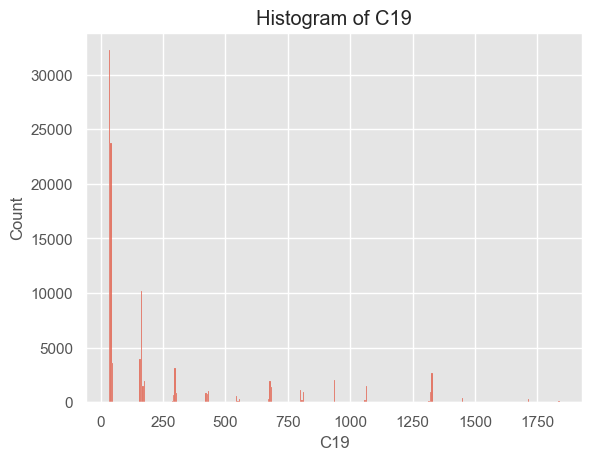

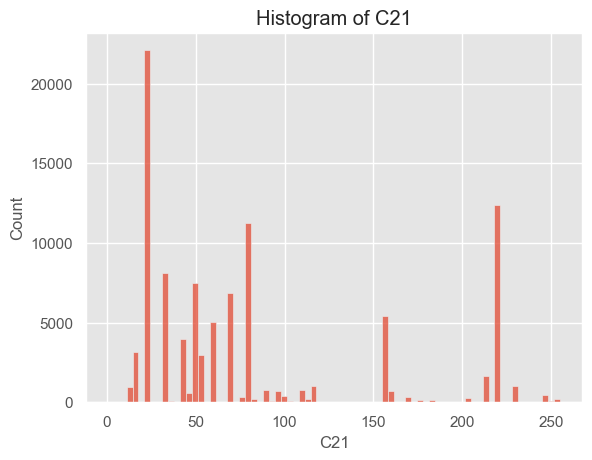

In [12]:
# Creating Histplot of Numerical Value
for i in num:
    sns.histplot(df[i])
    plt.title("Histogram of "+i)
    plt.show()

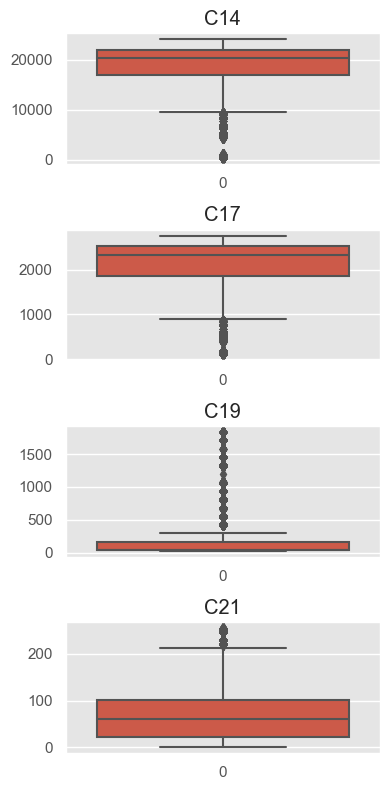

In [13]:
# Creating BOX Plot
num_rows = len(num)
num_cols = 1

fig, axes = plt.subplots(nrows=len(num), ncols=1, figsize=(4,8))

for i, col in enumerate(num):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

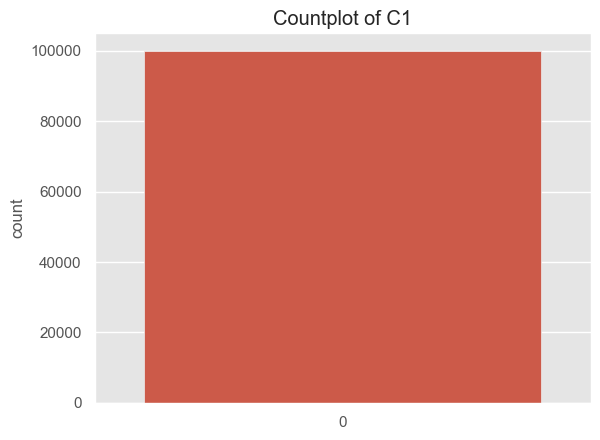

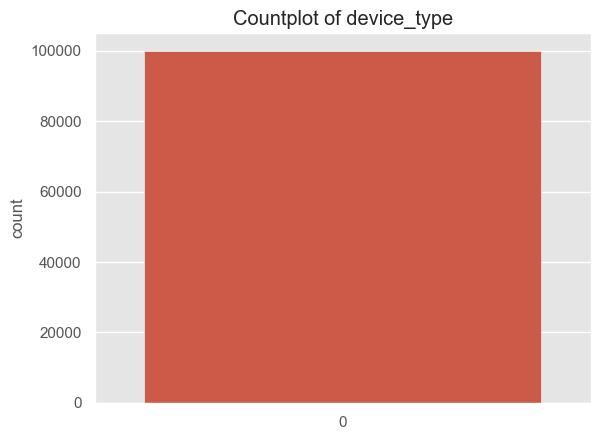

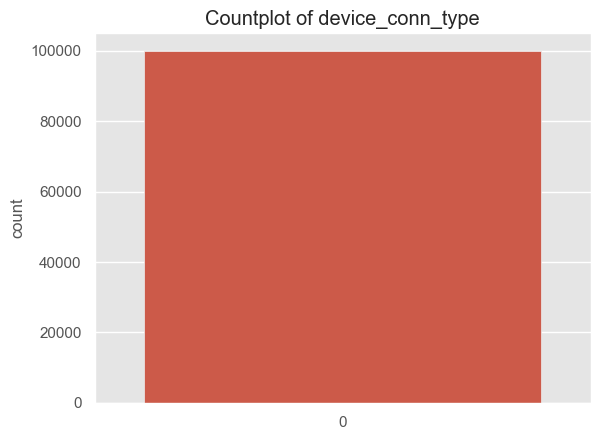

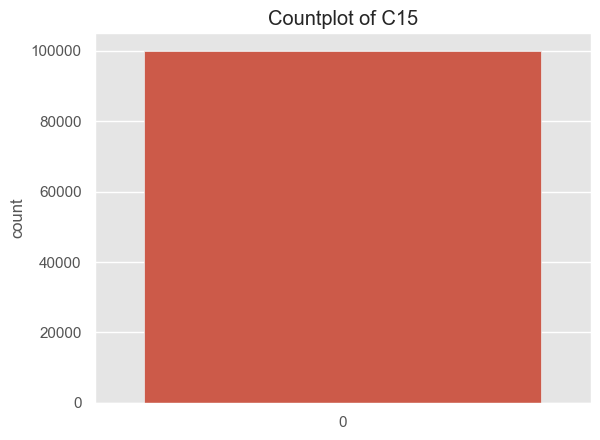

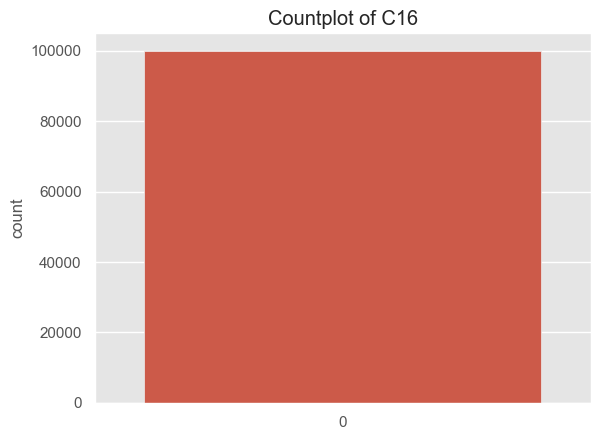

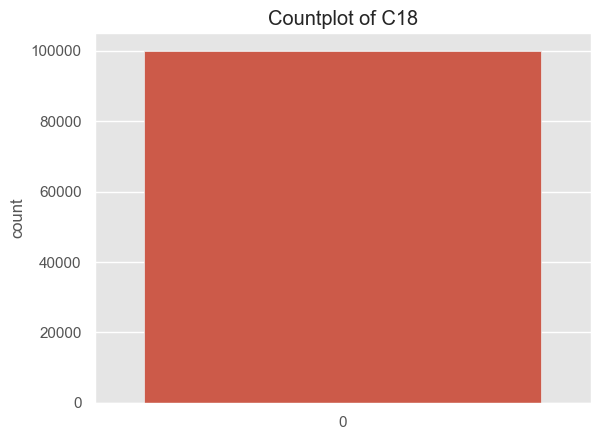

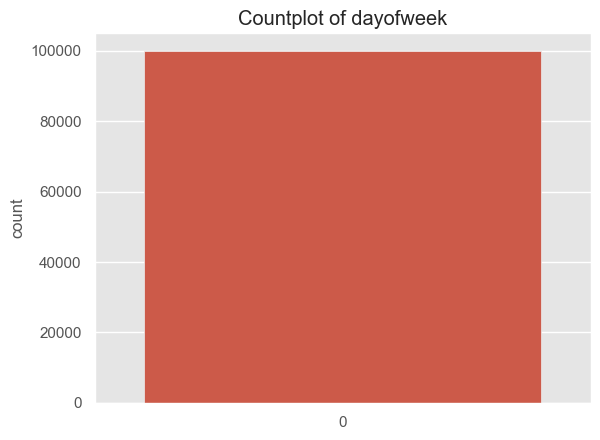

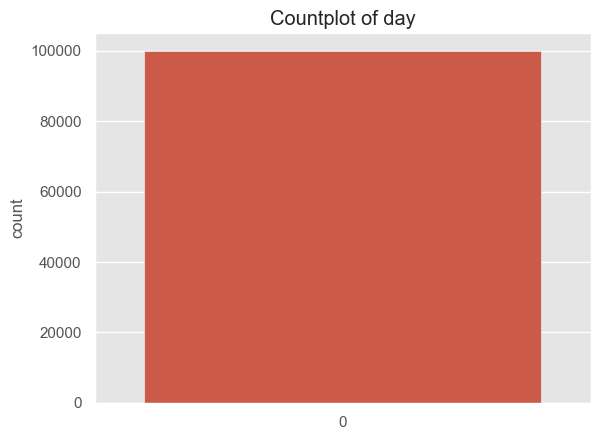

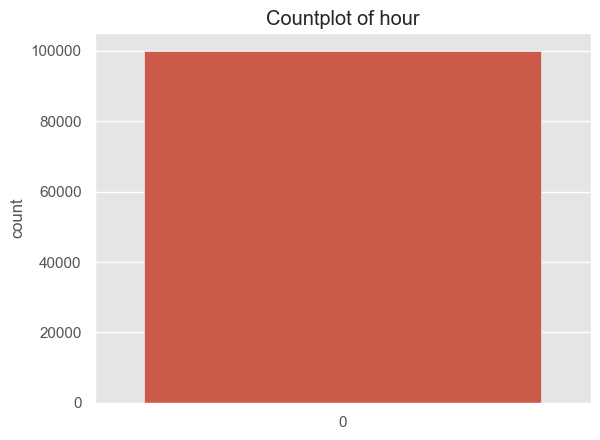

In [14]:
# Creating Countplot
for i in cat:
    sns.countplot(df[i])
    plt.title("Countplot of "+i)
    plt.show()

 <h2  style="font-size: 18px; color: #301E67;">Bivariate Analysis</h2>

<h2  style="font-size: 16px; color: #301E67;">Barplot(Target column Vs Numerical Columns )</h2>

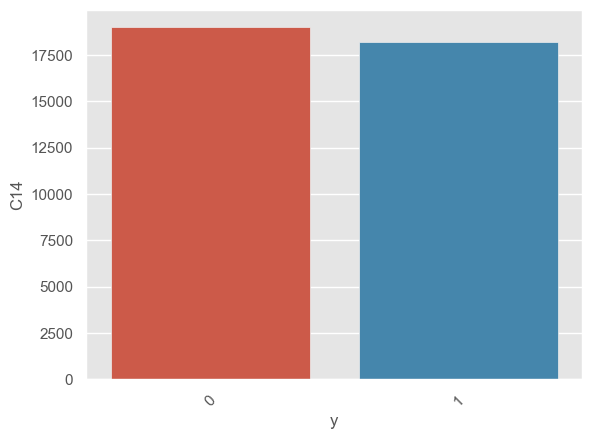

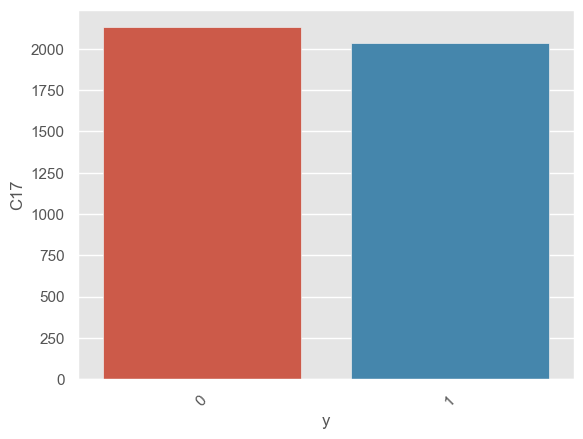

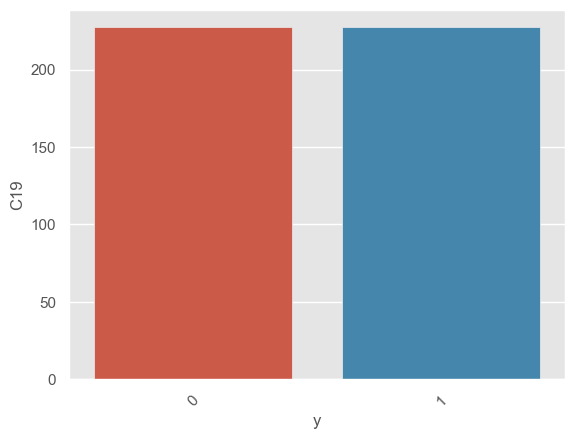

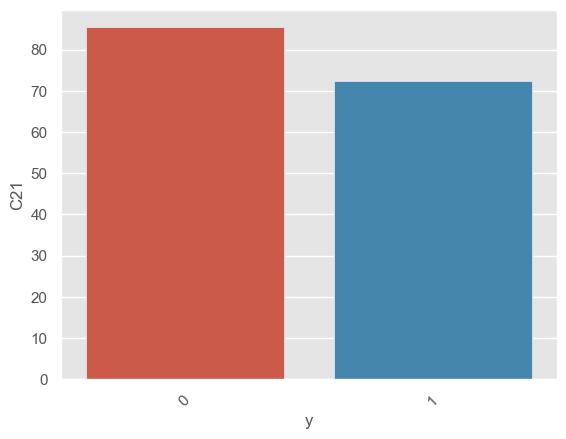

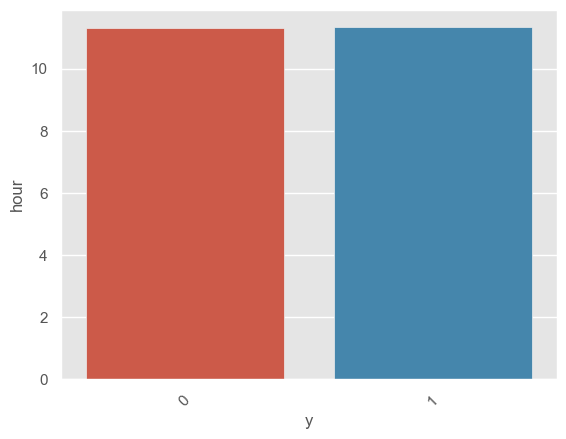

In [15]:
num = ['C14','C17','C19','C21','hour']

for i in num:
    sns.barplot(data = df, y = df[i], x = df['y'],ci = None)
    plt.xticks(rotation = 45)
    plt.show()

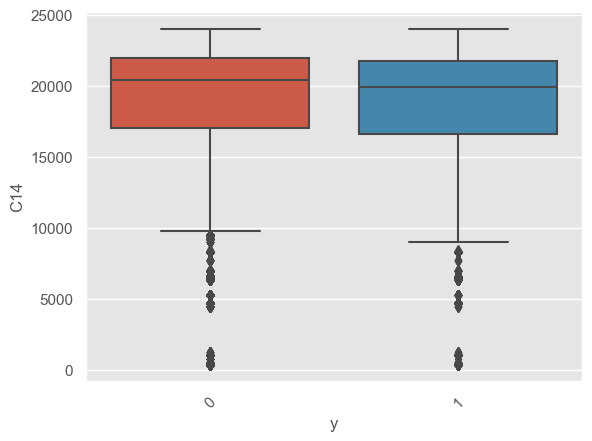

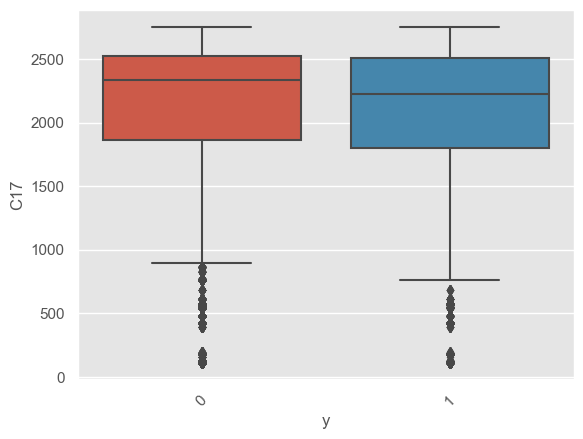

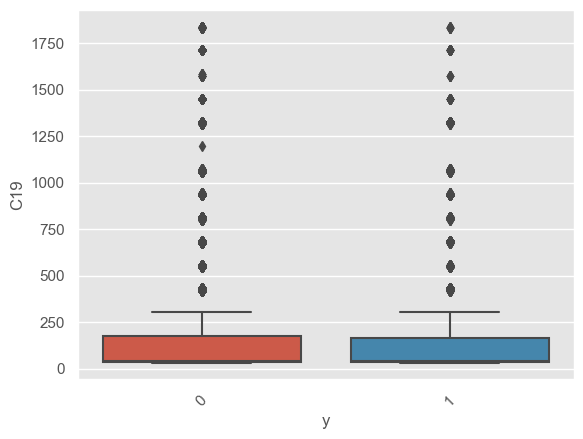

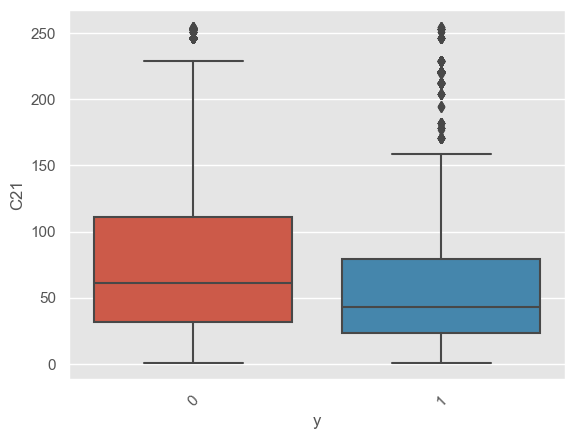

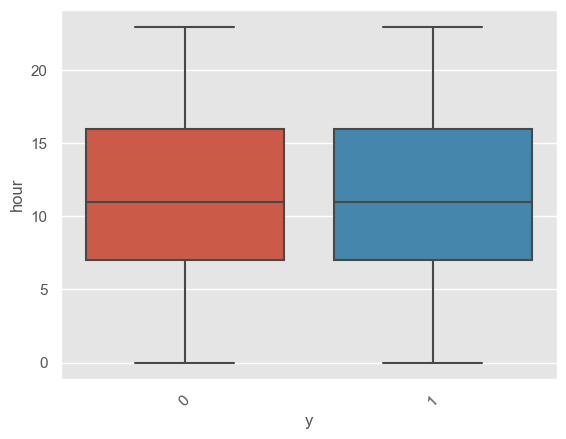

In [16]:
num = ['C14','C17','C19','C21','hour']

for i in num:
    sns.boxplot(data = df, y = df[i], x = df['y'])
    plt.xticks(rotation = 45)
    plt.show()

<h2  style="font-size: 18px; color: #301E67;">Outlier Treatment</h2>

In [17]:
# Forming a UDF for finding the value counts for each each value in the Columns
def value_counts_df(i):
    value_counts = df[i].value_counts().rename_axis(i).reset_index(name='counts')
    return(value_counts)

In [18]:
# Forming a UDF for treating the Outliers
def outliers_treat_C_cols(i,j):
    counts = df[i].value_counts()
    df.loc[df[i].isin(counts[counts <= j].index), i] = "Others"
    return (df[i].unique())

In [19]:
# Calling the UDF:
value_counts_df("C1")

,C1,counts
0,1005,91862
1,1002,5494
2,1010,2266
3,1012,254
4,1007,93
5,1001,21
6,1008,9


In [20]:
# Calling the UDF: outliers_treat_C_cols for treating the C1 Column outliers
outliers_treat_C_cols("C1",100)

array([1005, 1002, 1010, 1012, 'Others'], dtype=object)

In [21]:
# Checking for the records without Others in C1 Column
df[df["C1"]!= "Others"].shape

(99876, 23)

In [22]:
# Calling the UDF
value_counts_df("C14")

,C14,counts
0,4687,2306
1,21611,2192
2,21189,1908
3,21191,1902
4,19772,1827
...,...,...
1717,23228,1
1718,23688,1
1719,18859,1
1720,19742,1


In [23]:
# Calling the UDF:
outliers_treat_C_cols("C14",50)

array([22683, 17037, 'Others', 15708, 17614, 23369, 20984, 20392, 15705,
       21853, 20312, 21611, 15706, 20093, 21767, 21189, 20003, 22516,
       21764, 15702, 17262, 22680, 23725, 19771, 21731, 20352, 21758,
       19950, 23221, 1037, 21679, 14265, 20108, 22267, 16208, 4687, 23804,
       22260, 21757, 21790, 6563, 21882, 22738, 22624, 15701, 15699,
       17014, 22552, 23144, 22676, 19743, 21789, 21647, 15703, 23723,
       8330, 20634, 21732, 15704, 16011, 23368, 19251, 16920, 23160,
       17894, 19776, 17654, 22104, 16615, 21893, 22701, 22681, 22102,
       21878, 18858, 20395, 21676, 15707, 19772, 23438, 21665, 18987,
       20277, 24035, 23722, 456, 17875, 20391, 22682, 17753, 20008, 23626,
       22258, 17653, 380, 19775, 19015, 17264, 21191, 17239, 17747, 22561,
       22672, 22554, 20006, 21818, 454, 17081, 1038, 19016, 15908, 18095,
       16687, 21413, 20366, 6392, 20251, 20476, 21768, 21877, 22914,
       16858, 23552, 23441, 17016, 22268, 20362, 6560, 5299, 23390, 226

In [24]:
# Checking for the records without Others in C14 Column
df[df["C14"]!= "Others"].shape

(86870, 23)

In [25]:
# Calling the UDF:
value_counts_df("C15")

,C15,counts
0,320,93136
1,300,5872
2,216,776
3,728,186
4,120,10
5,480,9
6,1024,7
7,768,3


In [26]:
# Calling the UDF: outliers_treat_C_cols for treating the C15 Column outliers
outliers_treat_C_cols("C15",10)

array([320, 216, 300, 'Others', 728], dtype=object)

In [27]:
# Checking for the records without Others in C15 Column:
df[df["C15"]!= "Others"].shape

(99970, 23)

In [28]:
# Calling the UDF:
value_counts_df("C16")

,C16,counts
0,50,94209
1,250,4532
2,36,776
3,480,267
4,90,186
5,20,10
6,320,9
7,768,7
8,1024,3


In [29]:
# Calling the UDF: outliers_treat_C_cols for treating the C16 Column outliers

In [30]:
outliers_treat_C_cols("C16",10)

array([50, 36, 250, 'Others', 480, 90], dtype=object)

In [31]:
# Checking for the records without Others in C16 Column: (To know how much data is getting impacted after replacing outliers with Others Category)

In [32]:
df[df["C16"]!= "Others"].shape

(99970, 23)

In [33]:
# Calling the UDF: value_counts_df for C17 column to find out the outlier values, so as to replace it later with Others Category

In [34]:
# Calling the UDF: value_counts_df for C17 column to find out the outlier values, so as to replace it later with Others Category

In [35]:
value_counts_df("C17")

,C17,counts
0,1722,10991
1,2424,3810
2,2227,3662
3,1800,2953
4,423,2306
...,...,...
394,2525,1
395,2483,1
396,2582,1
397,2592,1


In [36]:
# Calling the UDF: outliers_treat_C_cols for treating the C17 Column outliers

In [37]:
outliers_treat_C_cols("C17",50)

array([2528, 1934, 2552, 2478, 1722, 1993, 2680, 2371, 2340, 2524, 1780,
       2480, 2295, 2506, 2424, 2282, 2597, 2657, 'Others', 1872, 2716,
       2227, 2502, 2333, 1800, 2303, 2676, 178, 2495, 1526, 2299, 2372,
       2566, 1447, 423, 2476, 2726, 2545, 2513, 572, 2526, 2636, 2374,
       2602, 2665, 2573, 2616, 2264, 2512, 2467, 2487, 2504, 761, 1769,
       2201, 1899, 2667, 2420, 2039, 2229, 1994, 1863, 2624, 2668, 2369,
       1882, 2684, 2724, 2493, 2158, 2281, 2755, 122, 2664, 2036, 2283,
       2707, 112, 2104, 2162, 2710, 1973, 2532, 1974, 2312, 2615, 2519,
       1921, 1752, 863, 2060, 1702, 547, 2323, 2348, 2617, 1887, 2699,
       2685, 2654, 1873, 571, 479, 2681, 2547, 2556, 2507, 2260, 2291,
       1823, 2550, 2253, 2688, 2572, 2316, 2683, 2749, 2637, 2286, 1741,
       2747, 2443, 1740, 576, 2515, 2736, 2496, 768, 2576, 2672, 2331,
       2650, 2338, 2498, 2325, 2682, 2523, 2553, 2658, 2522, 2695, 2225,
       2494, 1092, 2492, 2161, 2717, 2569, 2648, 2647, 2580, 2307

In [38]:
# Checking for the records without Others in C17 Column: (To know how much data is getting impacted after replacing outliers with Others Category)

In [39]:
df[df["C17"]!= "Others"].shape

(96776, 23)

In [40]:
# Calling the UDF: value_counts_df for C18 column to find out the outlier values, so as to replace it later with Others Category

In [41]:
value_counts_df("C18")

,C18,counts
0,0,41659
1,3,34043
2,2,17563
3,1,6734


In [42]:
# There is not outlier

In [43]:
# Calling the UDF: value_counts_df for C19 column to find out the outlier values, so as to replace it later with Others Category

In [44]:
value_counts_df("C19")

,C19,counts
0,35,29935
1,39,21905
2,167,7832
3,161,3956
4,47,3582
...,...,...
59,939,12
60,1583,7
61,683,3
62,45,3


In [45]:
# Calling the UDF: outliers_treat_C_cols for treating the C19 Column outliers

In [46]:
outliers_treat_C_cols("C19",100)

array([39, 167, 35, 1063, 815, 559, 41, 1711, 297, 161, 38, 47, 935, 1327,
       169, 813, 803, 163, 419, 427, 303, 547, 175, 'Others', 431, 34,
       687, 43, 171, 809, 679, 291, 937, 1319, 1059, 1065, 675, 33, 1451,
       299, 811, 681, 290, 551], dtype=object)

In [47]:
# Checking for the records without Others in C19 Column: (To know how much data is getting impacted after replacing outliers with Others Category)

In [48]:
df[df["C19"]!= "Others"].shape

(99187, 23)

In [49]:
# Calling the UDF: value_counts_df for C20 column to find out the outlier values, so as to replace it later with Others Category

In [50]:
value_counts_df("C20")

,C20,counts
0,-1,46767
1,100084,6071
2,100148,4405
3,100111,4143
4,100077,3915
...,...,...
149,100109,2
150,100043,2
151,100137,1
152,100175,1


In [51]:
# Checking for the records without Others in C20 Column: (To know how much data is getting impacted after replacing outliers with Others Category)

In [52]:
outliers_treat_C_cols("C20",50)

array([100075, -1, 100202, 100074, 100084, 100156, 100217, 100111, 100077,
       100189, 100003, 100013, 100079, 100148, 100176, 100083, 100141,
       100072, 100173, 100000, 100155, 100081, 100160, 100105, 100031,
       100076, 100004, 100182, 100143, 100048, 100193, 100062, 100192,
       100094, 100188, 100221, 100019, 100005, 100194, 'Others', 100199,
       100190, 100119, 100128, 100039, 100191, 100034, 100241, 100060,
       100168, 100170, 100144, 100101, 100020, 100106, 100162, 100233,
       100181, 100228, 100050, 100112, 100057, 100172, 100177, 100200,
       100028, 100130, 100059, 100103, 100183, 100055, 100151, 100021,
       100171, 100061, 100131, 100210, 100161], dtype=object)

In [53]:
# Calling the UDF: value_counts_df for C21 column to find out the outlier values, so as to replace it later with Others Category

In [54]:
value_counts_df("C21")

,C21,counts
0,23,22096
1,221,12352
2,79,11227
3,48,5381
4,71,5268
5,61,5056
6,157,4540
7,32,4383
8,33,3743
9,52,2984


In [55]:
# Calling the UDF: outliers_treat_C_cols for treating the C21 Column outliers

In [56]:
outliers_treat_C_cols("C21",100)

array([221, 16, 23, 79, 33, 42, 46, 159, 48, 61, 157, 71, 117, 'Others',
       15, 35, 52, 13, 32, 229, 68, 70, 182, 178, 51, 111, 101, 43, 69,
       156, 253, 76, 95, 171, 82, 110, 212, 17, 91, 100, 246, 112, 108,
       90, 204], dtype=object)

In [57]:
# Checking for the records without Others in C21 Column: (To know how much data is getting impacted after replacing outliers with Others Category)

In [58]:
df[df["C21"]!= "Others"].shape

(99608, 23)

In [59]:
# Checking the columns
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [60]:
# Checking the unique values for the C Columns

In [61]:
col = ['C1','C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C21']
for i in col:
    print("******************************************************************")
    print(i," ", df[i].unique())
    print("\n")

******************************************************************
C1   [1005 1002 1010 1012 'Others']


******************************************************************
C14   [22683 17037 'Others' 15708 17614 23369 20984 20392 15705 21853 20312
 21611 15706 20093 21767 21189 20003 22516 21764 15702 17262 22680 23725
 19771 21731 20352 21758 19950 23221 1037 21679 14265 20108 22267 16208
 4687 23804 22260 21757 21790 6563 21882 22738 22624 15701 15699 17014
 22552 23144 22676 19743 21789 21647 15703 23723 8330 20634 21732 15704
 16011 23368 19251 16920 23160 17894 19776 17654 22104 16615 21893 22701
 22681 22102 21878 18858 20395 21676 15707 19772 23438 21665 18987 20277
 24035 23722 456 17875 20391 22682 17753 20008 23626 22258 17653 380 19775
 19015 17264 21191 17239 17747 22561 22672 22554 20006 21818 454 17081
 1038 19016 15908 18095 16687 21413 20366 6392 20251 20476 21768 21877
 22914 16858 23552 23441 17016 22268 20362 6560 5299 23390 22677 23739
 21769 22261 19733 20633 20632

In [62]:
#Banner pos
value_counts_df('banner_pos')
outliers_treat_C_cols('banner_pos',100)

# Creating new column Weekly data
df['Weekly'] = df['dayofweek'].apply(lambda x : 'Start_of_Week' if x in [1,2,3] else ('mid_of_week' if x in[4,5] else 'Weekends'))

# Creating a column of times of dayand dropping Hour
df['times_of_day'] = df['hour'].apply(lambda x: 'morning' if x in [5,6,7,8,9,10,11] else ('Afternoon' if x in [12,13,14,15,16] else ( 'Evening' if x in [16,17,18,19,20] else('Night' if x in [21,22,23,0,1,2,3,4] else x))))
df.drop(['hour'],axis = 1, inplace = True)

In [63]:
# Hot Encoding
df = pd.get_dummies(df,columns = ['C15','C1','banner_pos','C16','Weekly','C18','device_type','device_conn_type','dayofweek','times_of_day'],drop_first=True)

In [64]:
# Sorting function and appending others in the end 
def sorting_func(df, column_name):
    value_counts = df[column_name].value_counts()

    sorted_data = pd.DataFrame(value_counts)

    sorted_data = sorted_data.reindex(index=sorted_data.index[sorted_data.index != 'Others'].append(sorted_data.index[sorted_data.index == 'Others']))

    # Set count of 'Others' to 0
    if 'Others' in sorted_data.index:
        sorted_data.loc['Others'] = 0

    sorted_data = sorted_data.reset_index().rename(columns={'index': column_name, column_name: 'Counts'})

    return sorted_data



In [65]:
### Label Encoding 
from sklearn.preprocessing import LabelEncoder

def label_encode(dataframe, column):
    encoder = LabelEncoder()
    encoded_values = encoder.fit_transform(dataframe[column])
    dataframe[column + '_encoded'] = encoded_values
    return dataframe

In [66]:
List = ['C14', 'C17', 'C19', 'C20', 'C21']

for column_name in List:
    variable_name = column_name + "_sorted"
    locals()[variable_name] = sorting_func(df,column_name)

In [67]:
# work on this variables 
C14_sorted_encoded = label_encode(C14_sorted,'Counts')
C17_sorted_encoded = label_encode(C17_sorted,'Counts')
C19_sorted_encoded = label_encode(C19_sorted,'Counts')
C20_sorted_encoded = label_encode(C20_sorted,'Counts')
C21_sorted_encoded = label_encode(C21_sorted,'Counts')

In [68]:
# Mapping the values finally in the main df: (mapping the label encodes now that we got through the label encode function)
# Here i is main df column name and j is the df which we are passing (this df: are mostly where counts_encoded values are there)
def map_values_in_main_df(i,j):
    mapping = dict(zip(j[i], j["Counts_encoded"]))
    df[i] = df[i].map(mapping)
    

In [69]:
# Mapping the values finally in the main df: 
Map_each_df = [C14_sorted_encoded, C17_sorted_encoded, C19_sorted_encoded, C20_sorted_encoded, C21_sorted_encoded]
Map_Col_in_main_df = ["C14", "C17", "C19", "C20","C21"]
for i,j in zip(Map_Col_in_main_df,Map_each_df):
    map_values_in_main_df(i,j)
    

In [70]:
# examing the Columns
df.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,C14,C17,C19,C20,C21,day,y,C15_300,C15_320,C15_728,C15_Others,C1_1005,C1_1010,C1_1012,C1_Others,banner_pos_1,banner_pos_7,banner_pos_Others,C16_50,C16_90,C16_250,C16_480,C16_Others,Weekly_Weekends,Weekly_mid_of_week,C18_1,C18_2,C18_3,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,times_of_day_Evening,times_of_day_Night,times_of_day_morning
0,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,be6db1d7,157,157,42,68,42,28,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1b13b020,151,109,42,73,25,22,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,9a45a8e8,0,19,41,35,43,23,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,ea6abc60,0,80,41,62,43,22,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,36d749e5,188,164,43,73,41,21,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [71]:
df.columns

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_model', 'C14', 'C17', 'C19', 'C20', 'C21',
       'day', 'y', 'C15_300', 'C15_320', 'C15_728', 'C15_Others', 'C1_1005',
       'C1_1010', 'C1_1012', 'C1_Others', 'banner_pos_1', 'banner_pos_7',
       'banner_pos_Others', 'C16_50', 'C16_90', 'C16_250', 'C16_480',
       'C16_Others', 'Weekly_Weekends', 'Weekly_mid_of_week', 'C18_1', 'C18_2',
       'C18_3', 'device_type_1', 'device_type_4', 'device_type_5',
       'device_conn_type_2', 'device_conn_type_3', 'device_conn_type_5',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'times_of_day_Evening',
       'times_of_day_Night', 'times_of_day_morning'],
      dtype='object')

In [72]:
# Rename y Column with Proper Logical Name of Clicks
df = df.rename(columns = {"y":"Clicks"})
df.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,C14,C17,C19,C20,C21,day,Clicks,C15_300,C15_320,C15_728,C15_Others,C1_1005,C1_1010,C1_1012,C1_Others,banner_pos_1,banner_pos_7,banner_pos_Others,C16_50,C16_90,C16_250,C16_480,C16_Others,Weekly_Weekends,Weekly_mid_of_week,C18_1,C18_2,C18_3,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,times_of_day_Evening,times_of_day_Night,times_of_day_morning
0,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,be6db1d7,157,157,42,68,42,28,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1b13b020,151,109,42,73,25,22,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,9a45a8e8,0,19,41,35,43,23,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,ea6abc60,0,80,41,62,43,22,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,36d749e5,188,164,43,73,41,21,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [73]:
# Putting the Clicks Column at the end of the main dataframe i.e. df
clicks_column = df.pop('Clicks')  # Remove 'Clicks' column from DataFrame
df['Clicks'] = clicks_column      # Add 'Clicks' column back at the end
df.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,C14,C17,C19,C20,C21,day,C15_300,C15_320,C15_728,C15_Others,C1_1005,C1_1010,C1_1012,C1_Others,banner_pos_1,banner_pos_7,banner_pos_Others,C16_50,C16_90,C16_250,C16_480,C16_Others,Weekly_Weekends,Weekly_mid_of_week,C18_1,C18_2,C18_3,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,times_of_day_Evening,times_of_day_Night,times_of_day_morning,Clicks
0,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,be6db1d7,157,157,42,68,42,28,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1b13b020,151,109,42,73,25,22,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,9a45a8e8,0,19,41,35,43,23,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,ea6abc60,0,80,41,62,43,22,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,36d749e5,188,164,43,73,41,21,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


<h2 align="center" , style="font-size: 28px; color: #301E67;">Model Building</h2>
<h2  style="font-size: 18px; color: #301E67;">________________________________________________________________________________________________</h2>

In [74]:
# Creating Independent and Target Variable
X = df.drop('Clicks',axis = 1)
Y = df.iloc[:,-1]

In [75]:
# creating Categorical data to Numerical
import category_encoders as ce
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, Y)
X.head(2)

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,C14,C17,C19,C20,C21,day,C15_300,C15_320,C15_728,C15_Others,C1_1005,C1_1010,C1_1012,C1_Others,banner_pos_1,banner_pos_7,banner_pos_Others,C16_50,C16_90,C16_250,C16_480,C16_Others,Weekly_Weekends,Weekly_mid_of_week,C18_1,C18_2,C18_3,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,times_of_day_Evening,times_of_day_Night,times_of_day_morning
0,0.034,0.034,0.177,0.197,0.194,0.198,0.189,157,157,42,68,42,28,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.296,0.259,0.177,0.197,0.194,0.198,0.276,151,109,42,73,25,22,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


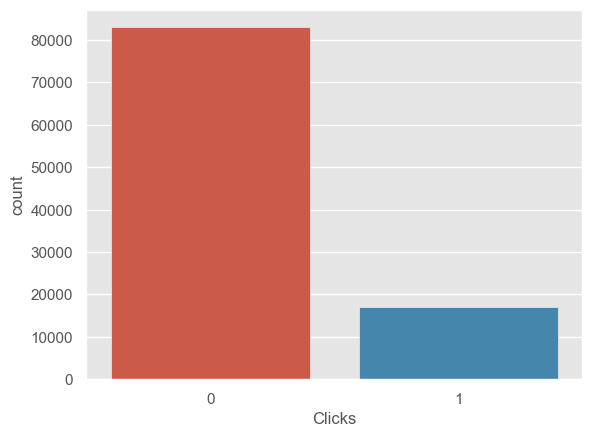

In [76]:
# Eaxming Balancing if the data
sns.countplot(x=Y)
plt.show()

In [77]:
# Balacing the data set
from imblearn.over_sampling import SMOTE

# Assuming you have X as your feature matrix and y as the target variable
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X,Y)

In [78]:
# Examing the data set
y_balanced.value_counts(normalize = True)

0   0.500
1   0.500
Name: Clicks, dtype: float64

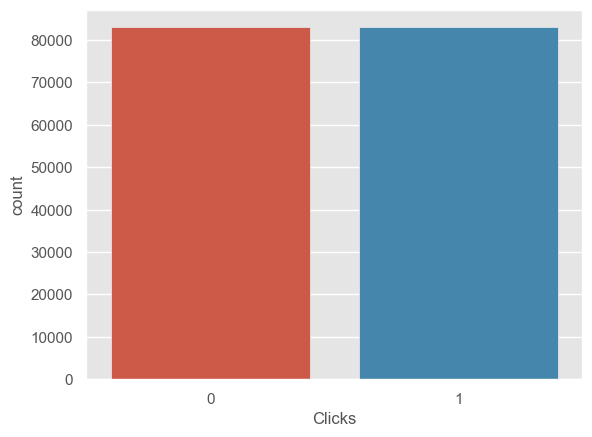

In [79]:
# Creating Count plot
sns.countplot(x=y_balanced)
plt.show()

<h2  style="font-size: 16px; color: #301E67;">Key Considerations</h2>

Here '**i**' has been used for the __**imbalanced dataset**__ and '__**b**__' has been used for the **balanced dataset**


In [80]:
## Spliting the data imbalanced data
X_train_i,X_test_i,y_train_i,y_test_i = train_test_split(X,Y, test_size=0.3, random_state= 55)

In [81]:
## Spliting the balanced data set
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state= 55)

In [82]:
# this function helps in evaluation the given model and provide accuracy and confusion matrix. 

def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #print(accuracy)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    #print(cnf_matrix)
    #metrics.plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    return accuracy, cnf_matrix

In [83]:
# Plots the ROC curve and returns false positive rate, true positive rate, and thresholds. 

def draw_roc(model, Xtest, actual):
    probs = model.predict(Xtest)
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [84]:
# this stores the results in dataframe for evaluating the final result. 

def store_results(name, ytrain, xtrain, ytest, xtest, model, folds):
    
    crossvalidation = cross_val(model, xtrain, ytrain, folds)
    
    accuracy_train, cm1 =  model_eval(model, xtrain, ytrain)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)
    
    accuracy_test, cm1 =  model_eval(model, xtest, ytest)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)

    entry = {'Model': [name],
          'Accuracy_train': [accuracy_train],
          'recall_train': [recall_train],
          'precision_train': [precision_train],
          'Accuracy_test': [accuracy_test],
          'recall_test': [recall_test],
          'precision_test': [precision_test],
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result

In [85]:
# Returns the ctossvalidation score for given number of n folds. 

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

<h2 align="center" style="font-size: 28px;text-decoration:  underline; color: #301E67;"> Dummy Classifier</h2>


In [87]:
# Dummy Classifier

outcome = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train_i, y_train_i)
accuracy, cnf_matrix  = model_eval(dummy_clf, X_train_i, y_train_i)
print(accuracy)
print(cnf_matrix)
temp = store_results("Dummy classifier", y_train_i, X_train_i, y_test_i, X_test_i, dummy_clf, 5)
outcome = outcome.append(temp)
outcome

0.8303404334347634
[[58123     0]
 [11876     0]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830


In [88]:
# Creating function for model evaluation
def sm_model_evaluation (model, x_test, y_test):
    X_sm = sm.add_constant(x_test)
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)


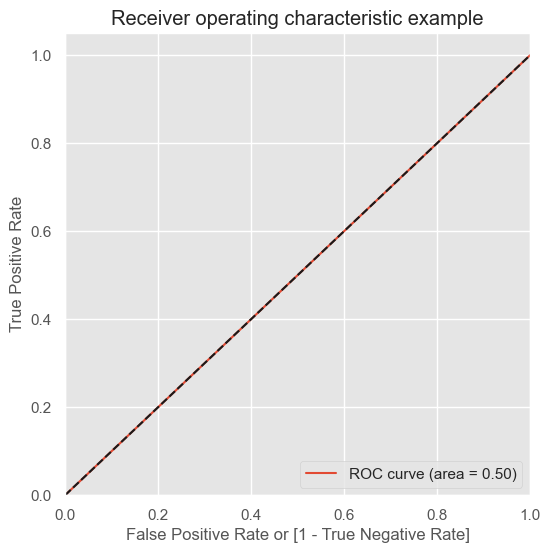

(array([0., 1.]), array([0., 1.]), array([1, 0], dtype=int64))

In [89]:
# Calling Roc function
draw_roc(dummy_clf, X_test_i, y_test_i)

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>

An ROC value of 0.50 indicates that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model is not performing well in classifying instances, and its predictions are essentially random.

<h2 align="center" style="font-size: 28px;text-decoration:  underline; color: #301E67;">Logistic Regression</h2>

 <h2  style="font-size: 18px; color: #301E67;">Logistic on imbalanced data</h2>


In [90]:
# Creating Object for Logistic Regression
model = LogisticRegression()
model.fit(X_train_i, y_train_i)

LogisticRegression()

In [91]:
# Predicting the model
y_pred = model.predict(X_test_i)
accuracy, cnf_matrix = model_eval(model, X_test_i, y_test_i)
# Printing Accuracy and confusion matrix 
print(accuracy)
print(cnf_matrix)
temp = store_results("logistic regres - imbalance predict", y_train_i, X_train_i, y_test_i, X_test_i, model, 5)
outcome = outcome.append(temp)
outcome

0.8307666666666667
[[24845    51]
 [ 5026    78]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830


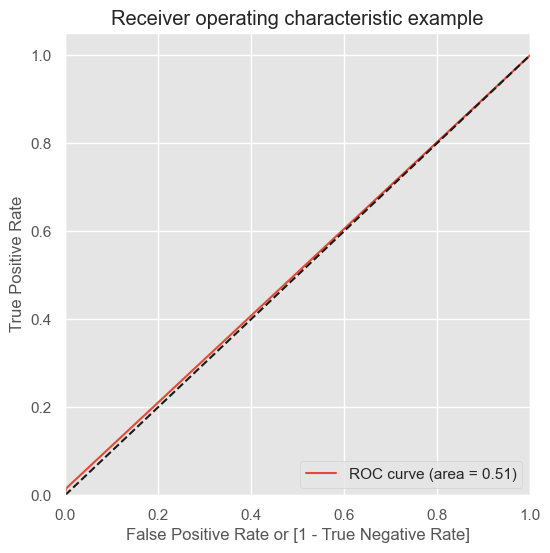

(array([0.        , 0.00204852, 1.        ]),
 array([0.        , 0.01528213, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [92]:
draw_roc(model, X_test_i, y_test_i)

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.51 indicates that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model is not performing well in classifying instances, and its predictions are essentially random.

<h2  style="font-size: 18px; color: #301E67;">Logistic Regression for Balanced Dataset</h2>

In [93]:
# Calling Logistic object
model = LogisticRegression()
model.fit(X_train_b, y_train_b)

LogisticRegression()

0.6776881072833856
[[17429  7456]
 [ 8599 16328]]


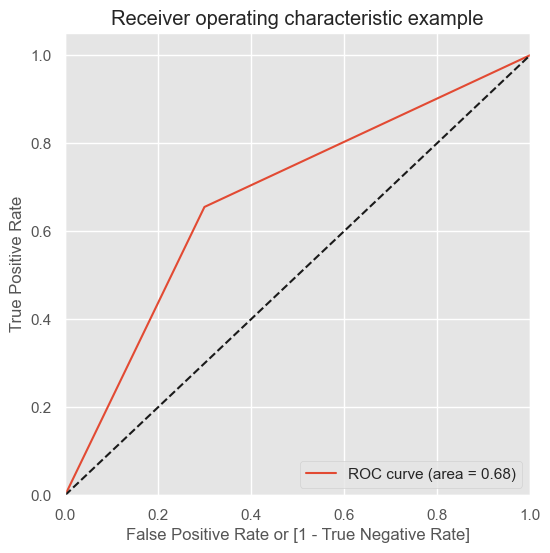

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679


In [94]:
# Predicting the model
y_pred = model.predict(X_test_b)
accuracy, cnf_matrix = model_eval(model, X_test_b, y_test_b)

# Printing Accuracy and  Confusion Matrix
print(accuracy)
print(cnf_matrix)

# Drawing Roc curve and calling store data set
temp = store_results("logistic regres - balance predict", y_train_b, X_train_b, y_test_b, X_test_b, model, 5)
draw_roc(model, X_test_b, y_test_b)
outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.67 indicates that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model is not performing well in classifying instances, and its predictions are essentially random.

In [95]:
## Logistic Using RFE


# Set the random seed for reproducibility
np.random.seed(100)

# Initialize your estimator model
estimator = LogisticRegression()

# Initialize the RFE object
selector = RFE(estimator, n_features_to_select=20)

# Fit the RFE object on your training data
selector.fit(X_train_i, y_train_i)

# Get the selected features

selector.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False])

In [96]:
# Keeping Selected Columns
cols_to_keep=X_train_i.columns[selector.support_]

In [97]:
# Splitting the data in train and test
X_train=X_train_b[cols_to_keep]
X_test=X_test_b[cols_to_keep]

In [98]:
# Adding Constant
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [99]:
# Creaing first model 
model1=sm.GLM(y_train_b,X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Clicks   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116205
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67724.
Date:                Tue, 27 Jun 2023   Deviance:                   1.3545e+05
Time:                        01:47:32   Pearson chi2:                 1.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1982
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.3196      0

In [100]:
# Dropping value with high p value
X_train_sm.drop(["site_category"],axis=1,inplace=True)
X_test_sm.drop(["site_category"],axis=1,inplace=True)

In [101]:
# Building the model 
model2=sm.GLM(y_train_b,X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Clicks   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116206
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67724.
Date:                Tue, 27 Jun 2023   Deviance:                   1.3545e+05
Time:                        01:47:33   Pearson chi2:                 1.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1982
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.3128      0

In [102]:
# Dropping the value with high p value
X_train_sm.drop(["C15_Others"],axis=1,inplace=True)
X_test_sm.drop(["C15_Others"],axis=1,inplace=True)

In [103]:
# Building model 
model3=sm.GLM(y_train_b,X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
print(result3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Clicks   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116207
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67726.
Date:                Tue, 27 Jun 2023   Deviance:                   1.3545e+05
Time:                        01:47:34   Pearson chi2:                 1.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1982
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.3148      0

In [104]:
# splitting the data set
X_train_sm.drop(["device_type_5"],axis=1,inplace=True)
X_test_sm.drop(["device_type_5"],axis=1,inplace=True)

In [105]:
# Building the model
model4=sm.GLM(y_train_b,X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
print(result4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Clicks   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116208
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67726.
Date:                Tue, 27 Jun 2023   Deviance:                   1.3545e+05
Time:                        01:47:35   Pearson chi2:                 1.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1982
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.3148      0

In [106]:
#lets Check Vif

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,63.575
1,site_id,7.360
2,site_domain,7.748
3,app_id,2.408
4,app_domain,2.439
5,app_category,1.890
6,device_model,1.484
7,C1_1010,1.238
8,C1_Others,1.111
9,banner_pos_7,1.125


In [107]:
# Dropping the feature with high VIF
X_train_sm.drop(["site_domain"],axis=1,inplace=True)
X_test_sm.drop(["site_domain"],axis=1,inplace=True)

In [108]:
# Building Model 
model5=sm.GLM(y_train_b,X_train_sm,family=sm.families.Binomial())
result5=model5.fit()
print(result5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Clicks   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116209
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67835.
Date:                Tue, 27 Jun 2023   Deviance:                   1.3567e+05
Time:                        01:47:39   Pearson chi2:                 1.24e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1967
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0902      0

In [109]:
# Calculating the VIF
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,56.850
1,site_id,1.838
2,app_id,2.407
3,app_domain,2.430
4,app_category,1.882
5,device_model,1.394
6,C1_1010,1.237
7,C1_Others,1.111
8,banner_pos_7,1.122
9,banner_pos_Others,1.017


In [110]:
# Creating Data Frame Train
train_pred=result5.predict(X_train_sm)
train=pd.DataFrame(train_pred,columns=["predicted_probs"])
train["actual"]=y_train_b
train["predicted"]=np.where(train["predicted_probs"]>0.5,1,0)# by default 0.5

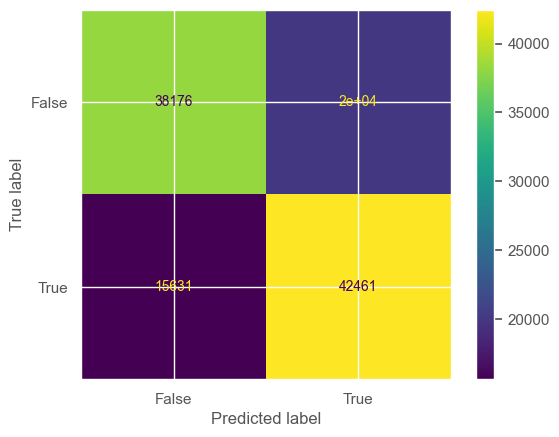

In [111]:
# Creating Confusion Matrix
confusion_matrix=metrics.confusion_matrix(train["actual"],train["predicted"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["False","True"])
cm_display.plot()
plt.show()

In [112]:
# Printing the train accuracy, recall and precision
print("Train Accuracy:",round(metrics.accuracy_score(train["actual"],train["predicted"])*100,2),"%")
print("Train Recall:",round(metrics.recall_score(train["actual"],train["predicted"])*100,2),"%")
print("Train Precision:",round(metrics.precision_score(train["actual"],train["predicted"])*100,2),"%")

Train Accuracy: 69.38 %
Train Recall: 73.09 %
Train Precision: 68.03 %


In [113]:
# calculating Confusion Matrix
y_train_pred = result5.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y': y_train_b, 'y_Prob': y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted)
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[38176 19958]
 [15631 42461]]
0.6937948479686129


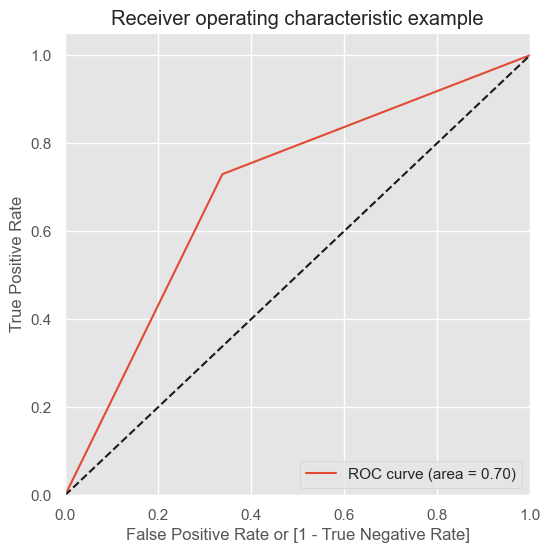

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692


In [114]:
# calculating  ROC and appending the model
model = LogisticRegression()
model.fit(X_train_sm, y_train_b)
accuracy, cnf_matrix = model_eval(model, X_test_sm[X_train_sm.columns], y_test_b)
temp = store_results("logistic reg with feature engine", y_train_b, X_train_sm, y_test_b, X_test_sm[X_train_sm.columns],
                     model, 5)
draw_roc(model, X_test_sm[X_train_sm.columns], y_test_b)
outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.70 suggests that the model has a moderate level of discrimination power in distinguishing between positive and negative classes. It indicates that the model is performing better than random chance and has some predictive capability.

<h2 align="center" style="font-size: 28px;text-decoration:  underline; color: #301E67;">Decision Tree</h2>


<h2  style="font-size: 18px; color: #301E67;">Decision Tree for Inbalanced Dataset</h2>

0.7585333333333333
[[21267  3629]
 [ 3615  1489]]


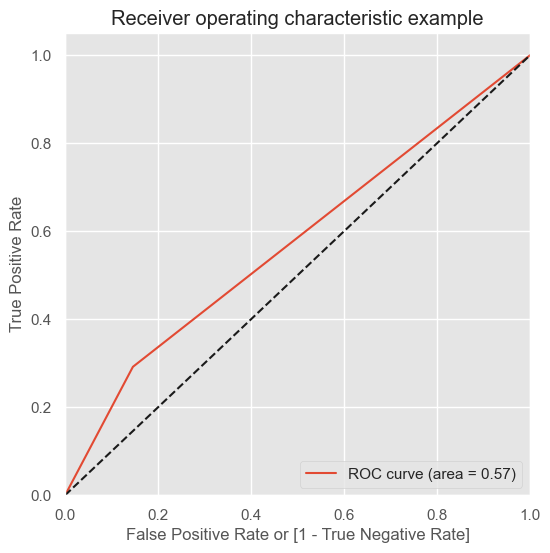

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692
0,decision tree basic - imbalance predict,0.976,0.989,0.870,0.759,0.291,0.292,0.758,0.760,0.758,0.754,0.760,0.757
0,decision tree basic - balance predict,0.982,0.991,0.974,0.792,0.796,0.784,0.784,0.787,0.777,0.782,0.789,0.784
0,Decision tree with feature engine - Imbalanced...,0.835,0.598,0.092,0.835,0.600,0.090,0.835,0.837,0.837,0.834,0.835,0.834
0,Decision tree with feature engine - Balanced Data,0.782,0.770,0.803,0.762,0.753,0.780,0.759,0.760,0.758,0.763,0.758,0.759
0,Random forest basic - imbalance predict,0.976,0.969,0.890,0.808,0.378,0.198,0.809,0.810,0.809,0.804,0.812,0.807
0,Random forest basic - balance predict,0.982,0.983,0.982,0.832,0.837,0.825,0.825,0.828,0.824,0.823,0.826,0.826


In [147]:
# Create a Decision Tree
dt_basic = DecisionTreeClassifier(random_state=42)

# Fit the training data
dt_basic.fit(X_train_i, y_train_i)

# Predict based on test data
y_preds = dt_basic.predict(X_test_i)

# Calculate and print Accuracy and Confusion Matrix
accuracy, cnf_matrix = model_eval(dt_basic, X_test_i, y_test_i)
print(accuracy)
print(cnf_matrix)

# Store results in temp
temp = store_results("decision tree basic - imbalance predict", y_train_i, X_train_i, y_test_i, X_test_i, dt_basic, 5)

# Plot ROC for the model
draw_roc(dt_basic, X_test_i, y_test_i)

# Append temp dataframe to outcome
outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.57 indicates that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model is not performing well in classifying instances, and its predictions are essentially random.

<h2  style="font-size: 18px; color: #301E67;">Decision Tree for Balanced Dataset</h2>

0.7915964024732997
[[19880  5005]
 [ 5376 19551]]


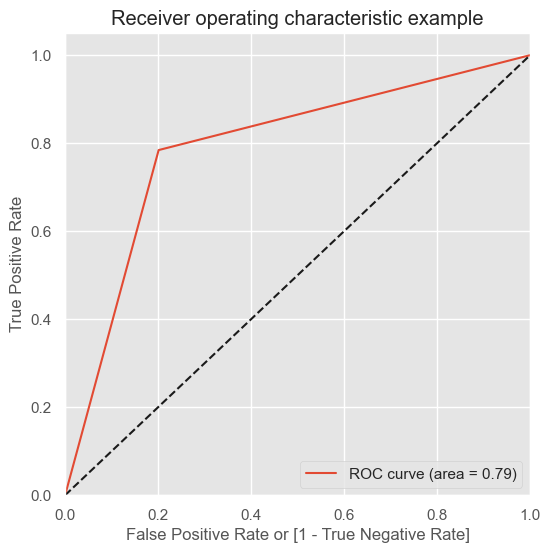

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692
0,decision tree basic - imbalance predict,0.976,0.989,0.870,0.759,0.291,0.292,0.758,0.760,0.758,0.754,0.760,0.757
0,decision tree basic - balance predict,0.982,0.991,0.974,0.792,0.796,0.784,0.784,0.787,0.777,0.782,0.789,0.784


In [116]:
# Create a Decision Tree
dt_basic = DecisionTreeClassifier(random_state=42)

# Fit the training data
dt_basic.fit(X_train_b, y_train_b)

# Predict based on test data
y_preds = dt_basic.predict(X_test_b)

# Calculate and print Accuracy and Confusion Matrix
accuracy, cnf_matrix = model_eval(dt_basic, X_test_b, y_test_b)
print(accuracy)
print(cnf_matrix)

# Store results in temp
temp = store_results("decision tree basic - balance predict", y_train_b, X_train_b, y_test_b, X_test_b, dt_basic, 5)

# Plot ROC for the model
draw_roc(dt_basic, X_test_b, y_test_b)

# Append temp dataframe to outcome
outcome = outcome.append(temp)
outcome


<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
A ROC value of 0.79 suggests that the model has a good level of discrimination power in distinguishing between positive and negative classes. It indicates that the model is performing well and has a strong predictive capability.

 <h2  style="font-size: 18px; color: #301E67;">Decision Tree for Imbalanced Dataset with RFE</h2>

In [119]:
# Create a Decision Tree
dt_tree = DecisionTreeClassifier(random_state=42)

# Fit the training data
dt_tree.fit(X_train_i, y_train_i)

# Create a dataframe df_dt which stores the importance of all the columns
feature_importances = dt_tree.feature_importances_
features = X_train_i.columns
df_dt = pd.DataFrame({'features': features, 'importance': feature_importances})
df_dt.sort_values(by='importance', ascending = False)

,features,importance
6,device_model,0.254
0,site_id,0.119
7,C14,0.113
10,C20,0.076
12,day,0.060
48,times_of_day_morning,0.037
8,C17,0.036
3,app_id,0.035
47,times_of_day_Night,0.030
1,site_domain,0.028


In [120]:
# Create a list with only those columns with an importance of greater than 0.012
df_dt = df_dt[df_dt.importance > 0.012]
rf_cols = []
for col in list(X_train_i.columns):
    if col in list(df_dt.features):
        rf_cols.append(col)

In [121]:
# Create a decision tree
dt_tree = DecisionTreeClassifier(random_state=42)

# Fit the training data
dt_tree.fit(X_train_i[rf_cols], y_train_i)

DecisionTreeClassifier(random_state=42)

['site_id', 'site_domain', 'app_id', 'device_model', 'C14', 'C17', 'C19', 'C20', 'C21', 'day', 'dayofweek_2', 'dayofweek_3', 'times_of_day_Evening', 'times_of_day_Night', 'times_of_day_morning']
15
Train results
accuracy 0.976156802240032
cnf_matrix 
 [[58010   113]
 [ 1556 10320]]
Test results
accuracy 0.758
cnf_matrix 
 [[21299  3597]
 [ 3663  1441]]


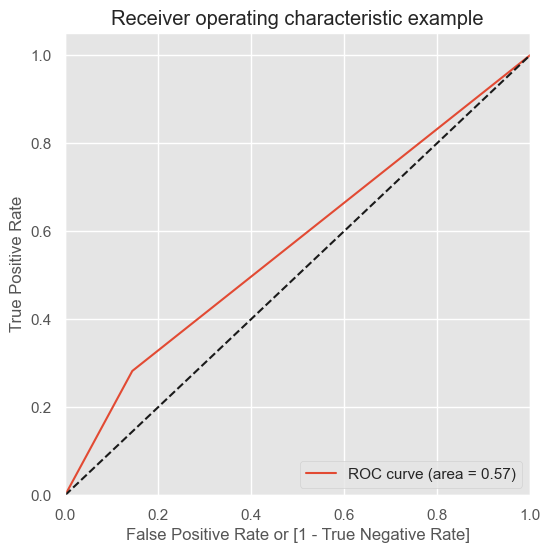

(array([0.        , 0.14448104, 1.        ]),
 array([0.        , 0.28232759, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [122]:
# Change X_train and X_test to contain on columns with importance > 0.012
print(rf_cols)
X_train_i_dt = X_train_i[rf_cols]
X_test_i_dt = X_test_i[rf_cols]
print(len(rf_cols))

# Predict based on data having columns with importance > 0.012
predict_rf = dt_tree.predict(X_train_i_dt)
predict_rf_test = dt_tree.predict(X_test_i_dt)

# Calculate and print Accuracy and Confusion Matrix for the train data
accuracy, cnf_matrix = model_eval(dt_tree, X_train_i_dt, y_train_i)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

# Calculate and print Accuracy and Confusion Matrix for the test data
accuracy, cnf_matrix = model_eval(dt_tree, X_test_i_dt, y_test_i)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

draw_roc(dt_tree, X_test_i_dt, y_test_i)

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.57 indicates that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model is not performing well in classifying instances, and its predictions are essentially random.

In [123]:
# Create a Parameter grid to find the ideal values for the selected parameters
param_grid = {
    'max_depth': range(1,15),
    'min_samples_leaf': range(10,200,20),
    'min_samples_split': range(50, 150, 50)
    
}
n_folds = 5
dtree = DecisionTreeClassifier(random_state= 42)
tree3 = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs =-1,return_train_score=True)
tree3.fit(X_train_i_dt, y_train_i)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(10, 200, 20),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True)

In [124]:
# Best values for the selected parameters
tree3.best_params_


{'max_depth': 5, 'min_samples_leaf': 190, 'min_samples_split': 50}

In [125]:
# Best values for the selected parameters
tree3.best_estimator_


DecisionTreeClassifier(max_depth=5, min_samples_leaf=190, min_samples_split=50,
                       random_state=42)

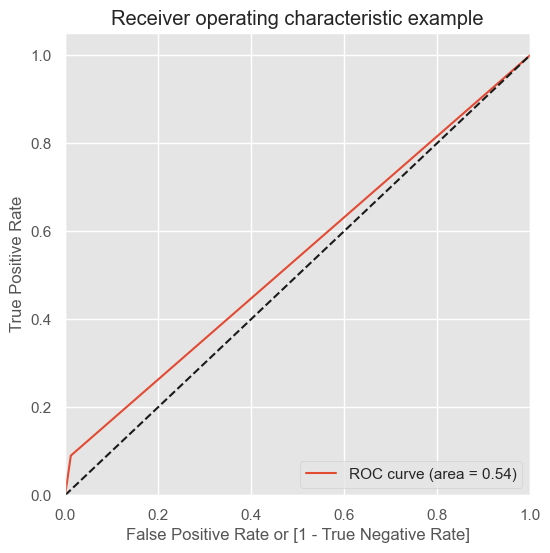

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692
0,decision tree basic - imbalance predict,0.976,0.989,0.870,0.759,0.291,0.292,0.758,0.760,0.758,0.754,0.760,0.757
0,decision tree basic - balance predict,0.982,0.991,0.974,0.792,0.796,0.784,0.784,0.787,0.777,0.782,0.789,0.784
0,Decision tree with feature engine - Imbalanced...,0.835,0.598,0.092,0.835,0.600,0.090,0.835,0.837,0.837,0.834,0.835,0.834


In [126]:
# Create a decision tree with the above parameters
dt_tree =  DecisionTreeClassifier(max_depth=5, min_samples_leaf=190, min_samples_split=50,
                       random_state=42)

# Fit the model
dt_tree.fit(X_train_i_dt, y_train_i)

# Calculate and print Accuracy and Confusion Matrix
accuracy, cnf_matrix = model_eval(dt_tree, X_test_i_dt, y_test_i)

# Store results in temp
temp = store_results("Decision tree with feature engine - Imbalanced Dataset", y_train_i, X_train_i_dt, y_test_i, X_test_i_dt,
                     dt_tree, 5)

# Plot ROC for the model
draw_roc(dt_tree, X_test_i_dt, y_test_i)

# Append temp dataframe to outcome
outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.54 indicates that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model is not performing well in classifying instances, and its predictions are essentially random.

<h2  style="font-size: 18px; color: #301E67;">Decision Tree for Balanced Dataset with RFE</h2>

In [127]:
# Create a Decision Tree
dt_tree = DecisionTreeClassifier(random_state=42)

# Fit the training data
dt_tree.fit(X_train_b, y_train_b)

# Create a dataframe df_dt which stores the importance of all the columns
feature_importances = dt_tree.feature_importances_
features = X_train_b.columns
df_b = pd.DataFrame({'features': features, 'importance': feature_importances})
df_b.sort_values(by='importance', ascending = False)




,features,importance
6,device_model,0.267
0,site_id,0.151
3,app_id,0.087
7,C14,0.077
10,C20,0.049
1,site_domain,0.041
12,day,0.040
2,site_category,0.038
8,C17,0.031
9,C19,0.025


In [128]:
# Create a list with only those columns with an importance of greater than 0.012
df_b = df_b[df_b.importance > 0.012]
rf_cols = []
for col in list(X_train_b.columns):
    if col in list(df_b.features):
        rf_cols.append(col)

In [129]:
# Change X_train and X_test to contain on columns with importance > 0.012

X_train_b_dt = X_train_b[rf_cols]
X_test_b_dt = X_test_b[rf_cols]

In [130]:
# Create a Decision Tree
dt_tree = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_tree.fit(X_train_b_dt[rf_cols], y_train_b)

DecisionTreeClassifier(random_state=42)

In [131]:
# Create a Parameter grid to find the ideal values for the selected parameters
param_grid = {
    'max_depth': range(1,15),
    'min_samples_leaf': range(10,200,20),
    'min_samples_split': range(50, 150, 50)
    
}
n_folds = 5
dtree = DecisionTreeClassifier(random_state= 42)
tree3 = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs =-1,return_train_score=True)
tree3.fit(X_train_b_dt, y_train_b)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(10, 200, 20),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True)

In [132]:
# Best values for the selected parameters

tree3.best_params_

{'max_depth': 14, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [133]:
# Best values for the selected parameters

tree3.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

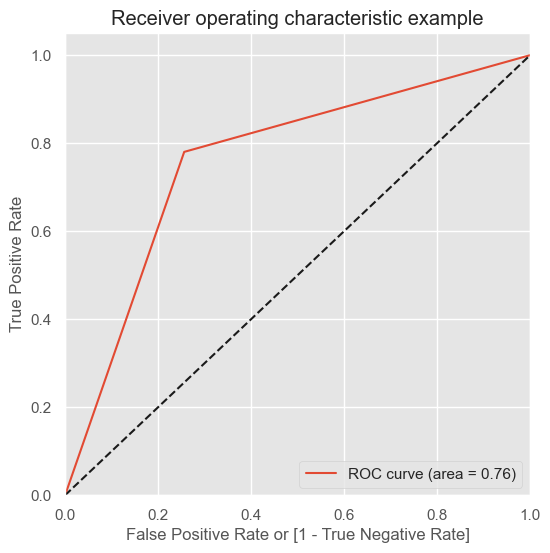

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692
0,decision tree basic - imbalance predict,0.976,0.989,0.870,0.759,0.291,0.292,0.758,0.760,0.758,0.754,0.760,0.757
0,decision tree basic - balance predict,0.982,0.991,0.974,0.792,0.796,0.784,0.784,0.787,0.777,0.782,0.789,0.784
0,Decision tree with feature engine - Imbalanced...,0.835,0.598,0.092,0.835,0.600,0.090,0.835,0.837,0.837,0.834,0.835,0.834
0,Decision tree with feature engine - Balanced Data,0.782,0.770,0.803,0.762,0.753,0.780,0.759,0.760,0.758,0.763,0.758,0.759


In [134]:
# Create a decision tree with the above parameters
dt_tree =  DecisionTreeClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

# Fit the model
dt_tree.fit(X_train_b_dt, y_train_b)

# Calculate and print Accuracy and Confusion Matrix
accuracy, cnf_matrix = model_eval(dt_tree, X_test_b_dt, y_test_b)

# Store results in temp
temp = store_results("Decision tree with feature engine - Balanced Data", y_train_b, X_train_b_dt, y_test_b, X_test_b_dt,
                     dt_tree, 5)

# Plot ROC for the model
draw_roc(dt_tree, X_test_b_dt, y_test_b)

# Append temp dataframe to outcome
outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.76 suggests that the model has a moderate level of discrimination power in distinguishing between positive and negative classes. It indicates that the model is performing better than random chance and has some predictive capability.

<h2 align="center" style="font-size: 28px;text-decoration:  underline; color: #301E67;">Random Forest</h2>

<h2  style="font-size: 18px; color: #301E67;">Random Forest with Imbalanced Dataset</h2>

In [135]:
#Creating a Random Forest Classifier model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_i, y_train_i)
y_preds = model_rf.predict(X_test_i)

0.8081
[[23230  1666]
 [ 4091  1013]]


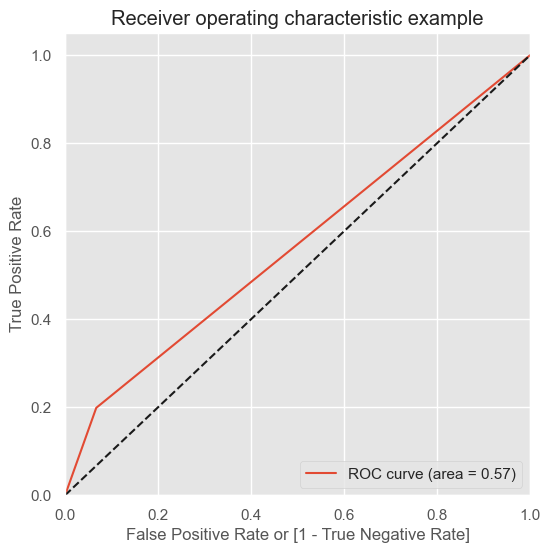

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692
0,decision tree basic - imbalance predict,0.976,0.989,0.870,0.759,0.291,0.292,0.758,0.760,0.758,0.754,0.760,0.757
0,decision tree basic - balance predict,0.982,0.991,0.974,0.792,0.796,0.784,0.784,0.787,0.777,0.782,0.789,0.784
0,Decision tree with feature engine - Imbalanced...,0.835,0.598,0.092,0.835,0.600,0.090,0.835,0.837,0.837,0.834,0.835,0.834
0,Decision tree with feature engine - Balanced Data,0.782,0.770,0.803,0.762,0.753,0.780,0.759,0.760,0.758,0.763,0.758,0.759
0,Random forest basic - imbalance predict,0.976,0.969,0.890,0.808,0.378,0.198,0.809,0.810,0.809,0.804,0.812,0.807


In [136]:
# Evaluate the model's accuracy and generate the confusion matrix
accuracy, cnf_matrix = model_eval(model_rf, X_test_i, y_test_i)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest basic - imbalance predict", y_train_i, X_train_i, y_test_i, X_test_i, model_rf, 5)
draw_roc(model_rf, X_test_i, y_test_i)
outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.57 indicates that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model is not performing well in classifying instances, and its predictions are essentially random.

 <h2  style="font-size: 18px; color: #301E67;">Random Forest with Balanced Dataset</h2>

In [137]:
#Creating a Random Forest Classifier model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_b, y_train_b)
y_preds = model_rf.predict(X_test_b)


0.8323295591423754
[[20894  3991]
 [ 4361 20566]]


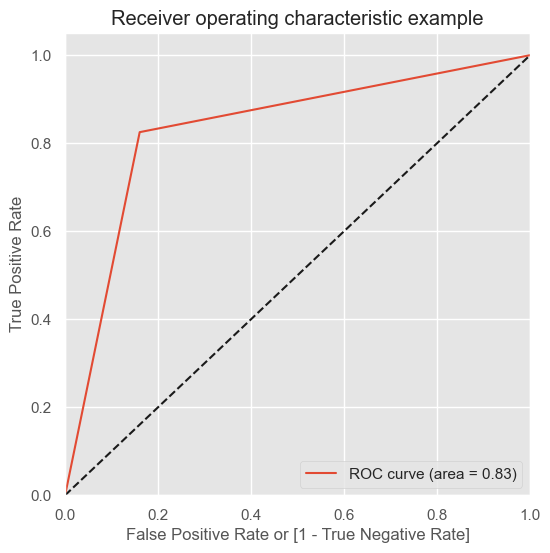

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692
0,decision tree basic - imbalance predict,0.976,0.989,0.870,0.759,0.291,0.292,0.758,0.760,0.758,0.754,0.760,0.757
0,decision tree basic - balance predict,0.982,0.991,0.974,0.792,0.796,0.784,0.784,0.787,0.777,0.782,0.789,0.784
0,Decision tree with feature engine - Imbalanced...,0.835,0.598,0.092,0.835,0.600,0.090,0.835,0.837,0.837,0.834,0.835,0.834
0,Decision tree with feature engine - Balanced Data,0.782,0.770,0.803,0.762,0.753,0.780,0.759,0.760,0.758,0.763,0.758,0.759
0,Random forest basic - imbalance predict,0.976,0.969,0.890,0.808,0.378,0.198,0.809,0.810,0.809,0.804,0.812,0.807
0,Random forest basic - balance predict,0.982,0.983,0.982,0.832,0.837,0.825,0.825,0.828,0.824,0.823,0.826,0.826


In [138]:
# Evaluate the model's accuracy and generate the confusion matrix

accuracy, cnf_matrix = model_eval(model_rf, X_test_b, y_test_b)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest basic - balance predict", y_train_b, X_train_b, y_test_b, X_test_b, model_rf, 5)
draw_roc(model_rf, X_test_b, y_test_b)
outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
A ROC value of 0.83 indicates that the model has a high level of discrimination power in distinguishing between positive and negative classes. It suggests that the model is performing very well and has a strong predictive capability.

<h2  style="font-size: 18px; color: #301E67;"> observation :</h2>

- Random forest data with imbalance data is over fitted for training data.
- Random forest with balanced data set is performing the best so far on both train and test data.
- Random forest with balanced data holding good for cross validation as well. 
- Conclusion based on simple models built :- Random forest on balanced data set is the best model built

<h2  style="font-size: 18px; color: #301E67;"> Random forest model for Imbalanced Dataset with feature engineering</h2>

In [139]:
#Creating a Random Forest Classifier model with featute engineering
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_i, y_train_i)
feature_importances = model_rf.feature_importances_
features = X_train_i.columns
df_rf = pd.DataFrame({'features': features, 'importance': feature_importances})
df_rf.sort_values(by='importance', ascending = False)

,features,importance
6,device_model,0.316
7,C14,0.108
10,C20,0.072
0,site_id,0.067
1,site_domain,0.053
12,day,0.040
3,app_id,0.038
8,C17,0.035
48,times_of_day_morning,0.032
47,times_of_day_Night,0.025


['site_id', 'site_domain', 'app_id', 'device_model', 'C14', 'C17', 'C19', 'C20', 'C21', 'day', 'times_of_day_Evening', 'times_of_day_Night', 'times_of_day_morning']
13
Train results
accuracy 0.9761425163216617
cnf_matrix 
 [[57762   361]
 [ 1309 10567]]
Test results
accuracy 0.8103666666666667
cnf_matrix 
 [[23265  1631]
 [ 4058  1046]]


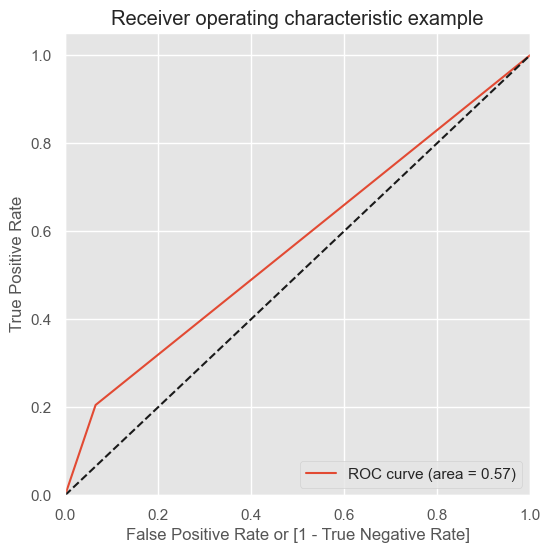

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692
0,decision tree basic - imbalance predict,0.976,0.989,0.870,0.759,0.291,0.292,0.758,0.760,0.758,0.754,0.760,0.757
0,decision tree basic - balance predict,0.982,0.991,0.974,0.792,0.796,0.784,0.784,0.787,0.777,0.782,0.789,0.784
0,Decision tree with feature engine - Imbalanced...,0.835,0.598,0.092,0.835,0.600,0.090,0.835,0.837,0.837,0.834,0.835,0.834
0,Decision tree with feature engine - Balanced Data,0.782,0.770,0.803,0.762,0.753,0.780,0.759,0.760,0.758,0.763,0.758,0.759
0,Random forest basic - imbalance predict,0.976,0.969,0.890,0.808,0.378,0.198,0.809,0.810,0.809,0.804,0.812,0.807
0,Random forest basic - balance predict,0.982,0.983,0.982,0.832,0.837,0.825,0.825,0.828,0.824,0.823,0.826,0.826


In [140]:
# Selecting the required feature
df_rf = df_rf[df_rf.importance > 0.012]
rf_cols = []
for col in list(X_train_i.columns):
    if col in list(df_rf.features):
        rf_cols.append(col)
        
X_train_i_rf = X_train_i[rf_cols]
X_test_i_rf = X_test_i[rf_cols]

# Building model

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_i_rf, y_train_i)
print(rf_cols)

# Printing the the columns and accuracy  
print(len(rf_cols))
predict_rf = model_rf.predict(X_train_i_rf)
predict_rf_test = model_rf.predict(X_test_i_rf)

accuracy, cnf_matrix = model_eval(model_rf, X_train_i_rf, y_train_i)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

accuracy, cnf_matrix = model_eval(model_rf, X_test_i_rf, y_test_i)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

draw_roc(model_rf, X_test_i_rf, y_test_i)

temp = store_results("Random forest with RFE - imbalance predict", y_train_i, X_train_i_rf, y_test_i, X_test_i_rf, model_rf, 5)

outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
An ROC value of 0.57 indicates that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model is not performing well in classifying instances, and its predictions are essentially random.

<h2  style="font-size: 18px; color: #301E67;"> Random forest model for Balanced Dataset with feature engineering</h2>

In [141]:
# Building Model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_b, y_train_b)
feature_importances = model_rf.feature_importances_
features = X_train_b.columns

# Creating Data Frame
df_rf = pd.DataFrame({'features': features, 'importance': feature_importances})
df_rf.sort_values(by='importance', ascending = False)

,features,importance
6,device_model,0.291
0,site_id,0.089
7,C14,0.079
1,site_domain,0.075
3,app_id,0.060
10,C20,0.052
12,day,0.032
8,C17,0.031
2,site_category,0.031
4,app_domain,0.030


['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_model', 'C14', 'C17', 'C19', 'C20', 'C21', 'day', 'times_of_day_Evening', 'times_of_day_Night', 'times_of_day_morning']
16
Train results
accuracy 0.9820091889938568
cnf_matrix 
 [[57167   967]
 [ 1124 56968]]
Test results
accuracy 0.8295189914076929
cnf_matrix 
 [[20853  4032]
 [ 4460 20467]]


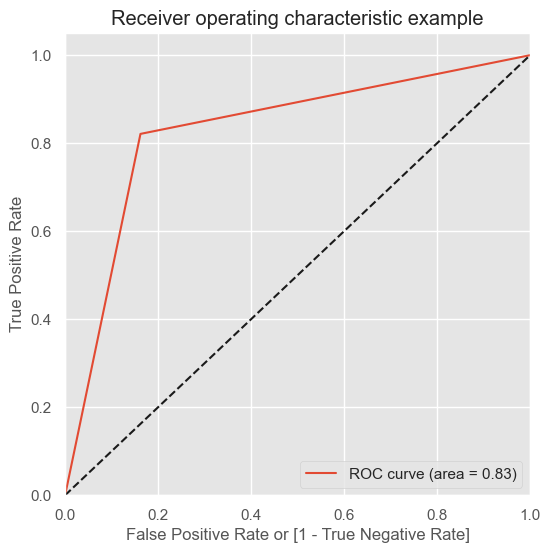

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830,NaN,0.000,0.830,NaN,0.000,0.830,0.830,0.830,0.830,0.830,0.830
0,logistic regres - imbalance predict,0.831,0.573,0.016,0.831,0.605,0.015,0.831,0.830,0.830,0.831,0.831,0.830
0,logistic regres - balance predict,0.681,0.687,0.665,0.678,0.687,0.655,0.675,0.677,0.675,0.678,0.668,0.679
0,logistic reg with feature engine,0.694,0.681,0.730,0.696,0.684,0.730,0.693,0.694,0.692,0.692,0.696,0.692
0,decision tree basic - imbalance predict,0.976,0.989,0.870,0.759,0.291,0.292,0.758,0.760,0.758,0.754,0.760,0.757
0,decision tree basic - balance predict,0.982,0.991,0.974,0.792,0.796,0.784,0.784,0.787,0.777,0.782,0.789,0.784
0,Decision tree with feature engine - Imbalanced...,0.835,0.598,0.092,0.835,0.600,0.090,0.835,0.837,0.837,0.834,0.835,0.834
0,Decision tree with feature engine - Balanced Data,0.782,0.770,0.803,0.762,0.753,0.780,0.759,0.760,0.758,0.763,0.758,0.759
0,Random forest basic - imbalance predict,0.976,0.969,0.890,0.808,0.378,0.198,0.809,0.810,0.809,0.804,0.812,0.807
0,Random forest basic - balance predict,0.982,0.983,0.982,0.832,0.837,0.825,0.825,0.828,0.824,0.823,0.826,0.826


In [142]:
# Selecting Required features
df_rf = df_rf[df_rf.importance > 0.012]
rf_cols = []
for col in list(X_train_b.columns):
    if col in list(df_rf.features):
        rf_cols.append(col)

In [ ]:
 # Spliting the data as per feature selection       
X_train_b_rf = X_train_b[rf_cols]
X_test_b_rf = X_test_b[rf_cols]

# Building Model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_b_rf, y_train_b)

# Predicting the model
print(rf_cols)
print(len(rf_cols))
predict_rf = model_rf.predict(X_train_b_rf)
predict_rf_test = model_rf.predict(X_test_b_rf)

In [ ]:
# printing the accuracy and confusin matrix
accuracy, cnf_matrix = model_eval(model_rf, X_train_b_rf, y_train_b)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

In [ ]:
# printing the accuracy and confusin matrix
accuracy, cnf_matrix = model_eval(model_rf, X_test_b_rf, y_test_b)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

In [ ]:
# printing ROC
temp = store_results("Random forest  with RFE - balance predict", y_train_b, X_train_b_rf, y_test_b, X_test_b_rf, model_rf, 5)
draw_roc(model_rf, X_test_b_rf, y_test_b)
outcome = outcome.append(temp)
outcome

<h2  style="font-size: 18px; color: #301E67;">Insight</h2>
A ROC value of 0.83 indicates that the model has a high level of discrimination power in distinguishing between positive and negative classes. It suggests that the model is performing very well and has a strong predictive capability.

<h2 align="center" style="font-size: 28px;text-decoration:  underline; color: #301E67;">Observation</h2>

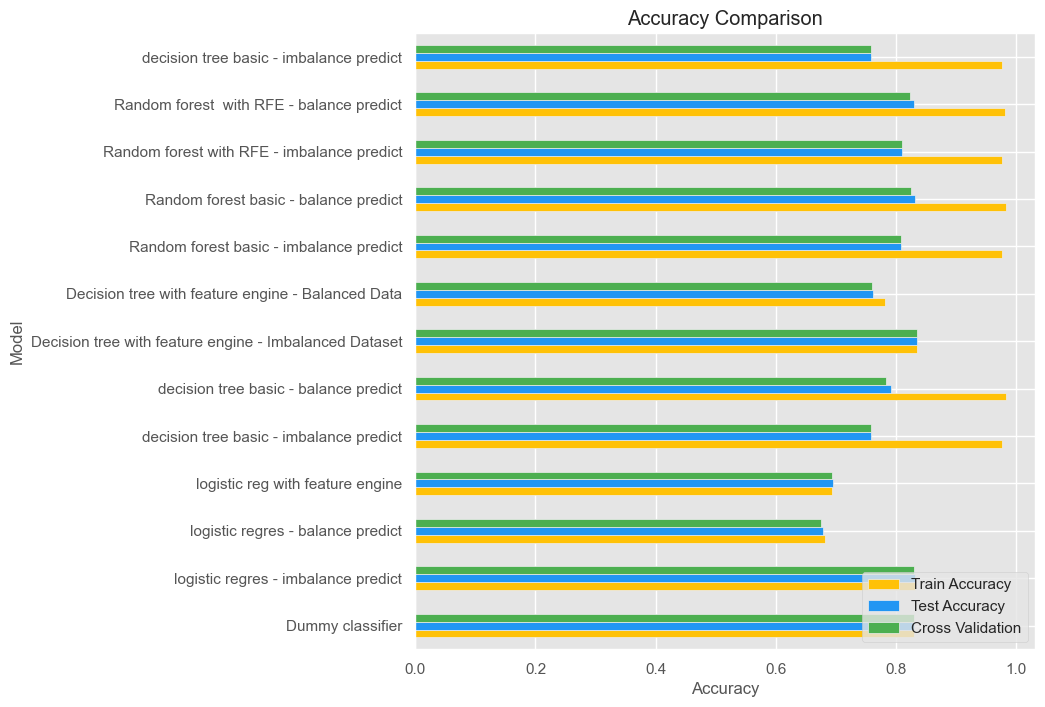

In [155]:
plt.rcParams["figure.figsize"] = (8, 8)

# Set custom colors for the bars
colors = ['#FFC107', '#2196F3', '#4CAF50']

# Plot the graph as a horizontal bar plot
outcome.plot(x='Model', y=['Accuracy_train', 'Accuracy_test', 'CrossVal_Mean'], kind="barh", color=colors)

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison')
plt.legend(['Train Accuracy', 'Test Accuracy', 'Cross Validation'], loc='lower right')

plt.show()


<h2  style="font-size: 18px; color: #301E67;">Insight</h2>

- Random forest classifier with feature engineering is the most promising and best model choice.
- Despite the training and test results appearing similar before and after feature engineering, the model demonstrates robustness with the new features and is well-fitted for both datasets.
- Decision tree and logistic regression classifiers exhibit lower accuracy, precision, and recall compared to the random forest classifier.
- Overall, the random forest classifier outperforms other models in all aspects.

<h2 align="center" style="font-size: 36px;text-decoration:  underline; color: #301E67;">END</h2>
